In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

##### Se utilizó un dataframe con datos médicos de distintos pacientes con cancer. En base a estos datos se entrenara a un modelo de regresión lineal para que pueda predecir el índice de masa corporal de un paciente.

In [6]:
df = pd.read_csv("dataset_med.csv")
df.tail(5)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0
889999,890000,55.0,Female,Malta,2021-07-26,Stage II,Yes,Current Smoker,42.8,250,0,0,0,0,Combined,2022-10-19,0


#### El dataframe no contenia datos nulos

In [7]:
df.isnull().sum()


id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64

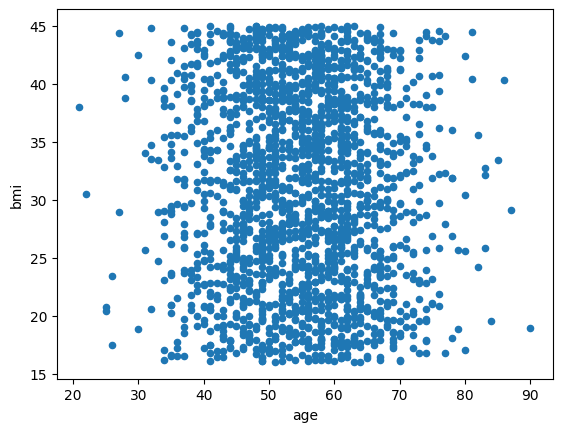

In [36]:
df.head(2000).plot.scatter(x="age", y="bmi")
plt.show()

#### Creamos una variable con las columnas que utilizaremos para el entrenar el modelo, las columnas con datos string se las pasara a código binario.

In [9]:
features = ["age","gender","smoking_status","hypertension"]
preprocesor = ColumnTransformer(transformers=[("cat", OneHotEncoder(),["gender","smoking_status"])],remainder="passthrough")

In [11]:
x = preprocesor.fit_transform(df[features])
y = df["bmi"]

In [12]:
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [48]:
new_data = {
    'age': [10],
    'gender': ['Male'],
    'smoking_status': ['Passive Smoker'],
    'hypertension': [1]
}
new_df = pd.DataFrame(new_data)

# Preprocesar y predecir
X_new = preprocesor.transform(new_df)
predictions = modelo.predict(X_new)
print("Predicciones de BMI:", predictions)

Predicciones de BMI: [30.49001522]


Error cuadratico medio:  70.03185197371108


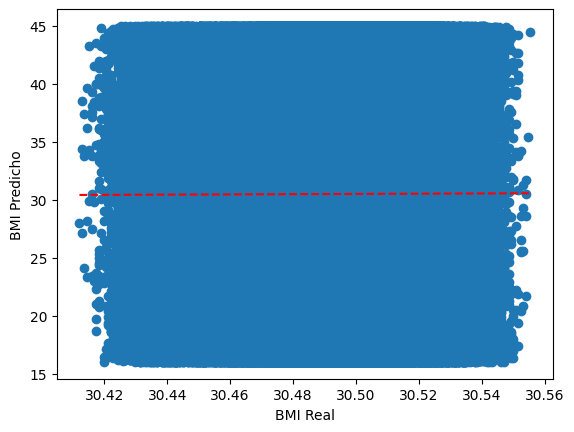

In [31]:
mse = mean_squared_error(df["bmi"],predictions)
print("Error cuadratico medio: ", mse)

plt.scatter(predictions, y)
plt.xlabel("BMI Real")
plt.ylabel("BMI Predicho")
plt.plot([min(predictions), max(predictions)], [min(predictions), max(predictions)], 'r--')  # Línea de referencia
plt.show()

In [40]:
feature_names = preprocesor.get_feature_names_out()

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({'feature': feature_names, 'coef': modelo.coef_})
print(coef_df)

                              feature      coef
0                  cat__gender_Female -0.004216
1                    cat__gender_Male  0.004216
2  cat__smoking_status_Current Smoker  0.001979
3   cat__smoking_status_Former Smoker -0.020678
4    cat__smoking_status_Never Smoked  0.001765
5  cat__smoking_status_Passive Smoker  0.016934
6                      remainder__age  0.000769
7             remainder__hypertension  0.037215
